In [ ]:
!pip install squarify --quiet
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load dataset (replace with your dataset path if needed)
df = pd.read_csv("/content/banking_loan_applications.csv")

# Check first few records
print(df.head())



                         Application_ID            Name  Age  Gender  \
0  452a28a8-b843-46e7-9899-cebb5d08b543     John Rogers   45   Other   
1  192ef1a4-8873-475e-bac2-fad52db13d65   Angela Mathis   22   Other   
2  c40decf6-7735-4ea2-b7ee-8c8da21ea815   Michael Jones   22  Female   
3  fa2b6c89-73ed-4e42-829d-1da66ec81330    Angela Jones   64   Other   
4  d6143598-dce1-4634-b293-3ea4270ea14f  Phillip Howard   58   Other   

  Marital_Status    Education Employment_Type  Annual_Income  Loan_Amount  \
0       Divorced  High School        Salaried      110366.09     10094.78   
1       Divorced          PhD   Self-employed       55791.93     36131.95   
2        Widowed          PhD         Retired       59056.42     22311.54   
3        Widowed     Bachelor      Unemployed      133990.84     33652.43   
4         Single     Bachelor        Salaried       59408.94     46053.04   

  Loan_Purpose  Credit_Score  Loan_Term_Months Loan_Status Application_Date  
0    Education           6

  Loan_Purpose  Loan_Amount
1          Car   2514888.30
2    Education   2316079.46
0     Business   2069798.44
3         Home   1956659.30
4     Personal   1883122.73


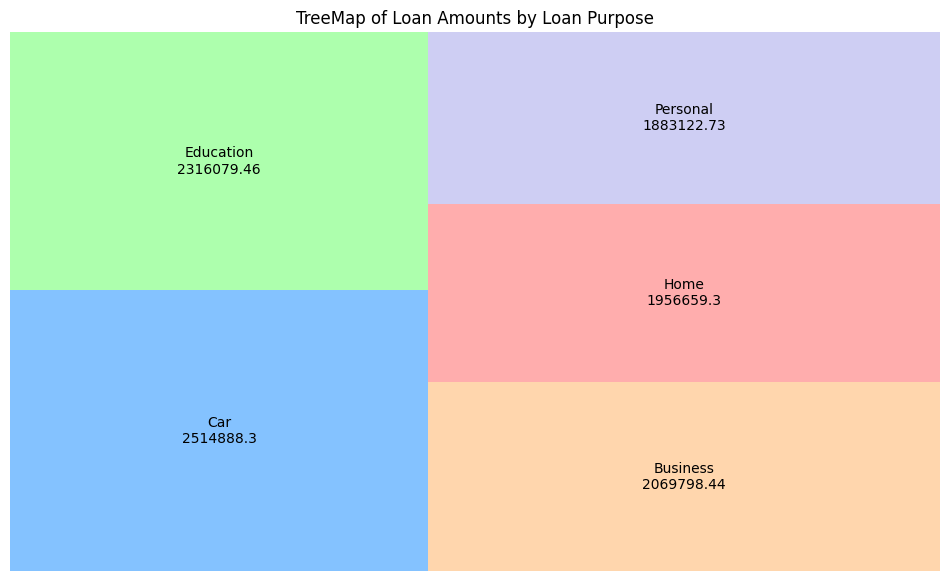

In [ ]:
# Aggregate Loan Amount by Loan Purpose
treemap_data = df.groupby('Loan_Purpose')['Loan_Amount'].sum().reset_index()

# Sort values for better visualization
treemap_data = treemap_data.sort_values(by='Loan_Amount', ascending=False)

print(treemap_data)
# TreeMap plot
plt.figure(figsize=(12, 7))
squarify.plot(
    sizes=treemap_data['Loan_Amount'],
    label=treemap_data['Loan_Purpose'] + "\n" + treemap_data['Loan_Amount'].round(2).astype(str),
    alpha=0.8,
    color=['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0']
)
plt.title("TreeMap of Loan Amounts by Loan Purpose")
plt.axis('off')
plt.show()


In [ ]:
# Build Sunburst Chart
fig = px.sunburst(
    df,
    path=['Gender', 'Loan_Purpose', 'Loan_Status'],  # Hierarchical levels
    values='Loan_Amount',  # Size of segments based on Loan Amount
    color='Loan_Status',   # Color by Loan Status
    color_discrete_map={'Approved': 'green', 'Rejected': 'red'}
)

fig.update_layout(title="Sunburst Chart - Gender → Loan Purpose → Loan Status")
fig.show()
